In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

In [21]:
df_loch = pd.read_csv('/home/walml/repos/morphology-tools/temp_replication_updated_b03996c_old_distances_repeat5_gp9.csv')

In [28]:
# df_scratch = pd.read_csv('/home/walml/repos/morphology-tools/temp_score_df.csv')
df_scratch = pd.read_csv('/home/walml/repos/morphology-tools/temp_active_df.csv')
del df_scratch['all_scores']  # before rescaling from 0 to 5

In [29]:
len(df_loch), len(df_scratch)

(60715, 60715)

In [30]:
df_loch

,objid,active_score_loch,score_loch,human_label,is_anomaly
0,991603,0.273164,0.277290,NaN,False
1,246741,0.217615,0.220367,NaN,False
2,749571,0.606745,0.612946,NaN,False
3,114682,0.901409,0.938501,NaN,False
4,498756,0.628456,0.640274,NaN,False
...,...,...,...,...,...
60710,332331,2.458123,2.531313,NaN,False
60711,288481,0.177591,0.179946,NaN,False
60712,579346,0.225535,0.227766,NaN,False
60713,123382,0.223022,0.227297,NaN,False


In [31]:
df_loch = df_loch.rename(columns={'Unnamed: 0': 'objid'})
df_loch = df_loch.rename(columns={
    'score': 'score_loch',
    'trained_score': 'active_score_loch'})

In [32]:

df_scratch
df_scratch = df_scratch.rename(columns={
    'rescaled_scores': 'score_scratch',
    'joint_preds': 'active_score_scratch',
    
})

In [33]:
df = pd.merge(df_loch, df_scratch, on='objid', how='inner')
df

,objid,active_score_loch,score_loch,human_label,is_anomaly,score_scratch,active_score_scratch,labels,active_weighted_sorted_labels
0,991603,0.273164,0.277290,NaN,False,0.220710,0.217656,False,False
1,246741,0.217615,0.220367,NaN,False,0.113645,0.112405,False,False
2,749571,0.606745,0.612946,NaN,False,0.677337,0.671073,False,False
3,114682,0.901409,0.938501,NaN,False,1.032201,0.993064,False,False
4,498756,0.628456,0.640274,NaN,False,0.613352,0.608307,False,False
...,...,...,...,...,...,...,...,...,...
60710,332331,2.458123,2.531313,NaN,False,2.528379,2.452351,False,False
60711,288481,0.177591,0.179946,NaN,False,0.263746,0.259953,False,False
60712,579346,0.225535,0.227766,NaN,False,0.149699,0.148349,False,False
60713,123382,0.223022,0.227297,NaN,False,0.289678,0.282895,False,False


In [10]:
assert all(df['is_anomaly'] == df['labels'])

In [35]:
df.sort_values('score_loch', ascending=False)[:200]['is_anomaly'].sum(), df.sort_values('score_loch', ascending=False)[:50]['is_anomaly'].sum() # lochner without active

(50, 20)

In [37]:
df.sort_values('score_scratch', ascending=False)[:200]['is_anomaly'].sum(), df.sort_values('score_scratch', ascending=False)[:50]['is_anomaly'].sum()  # me without active

(53, 21)

In [34]:
df.sort_values('active_score_loch', ascending=False)[:200]['is_anomaly'].sum(), df.sort_values('active_score_loch', ascending=False)[:50]['is_anomaly'].sum()  # lochner with active

(78, 34)

In [36]:
df.sort_values('active_score_scratch', ascending=False)[:200]['is_anomaly'].sum(), df.sort_values('active_score_scratch', ascending=False)[:50]['is_anomaly'].sum()  # me with active

(76, 35)

In [ ]:
# without active is similar but with active, mine is a bit worse - most likely an active learning problem

Text(0, 0.5, 'user-weighted loch')

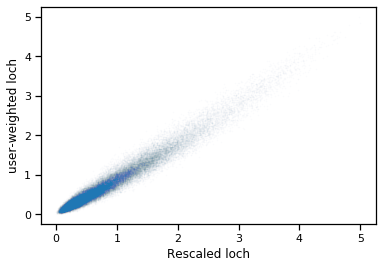

In [38]:
plt.scatter(df['score_scratch'], df['score_loch'], alpha=.01, s=1.)  # score and trained_score are from loch (trained score is user-weighted), score is in fact rescaled
plt.xlabel('Rescaled loch')
plt.ylabel('user-weighted loch')

In [39]:
# plt.scatter(df['score_scratch'], df['all_scores'], alpha=.01, s=1.)  # rescaled and all are from scratch
# plt.xlabel('Rescaled mine')
# plt.ylabel('raw scores mine')

In [41]:
# plt.scatter(df['score_scratch'], df['score_loch'], alpha=.01, s=1.)
# # both our reweighted scores agree pretty well (though not exactly)

Text(0, 0.5, 'scratch trained score')

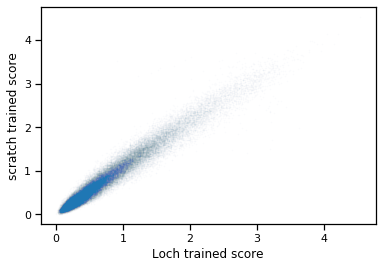

In [42]:
plt.scatter(df['active_score_loch'], df['active_score_scratch'], alpha=.01, s=1.)
plt.xlabel('Loch trained score')
plt.ylabel('scratch trained score')
# both our reweighted scores agree pretty well (though not exactly)

Text(0, 0.5, 'scratch trained score')

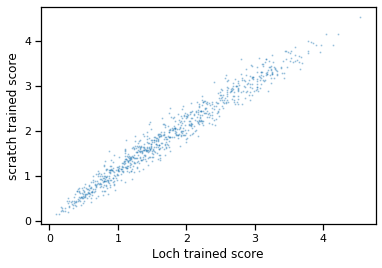

In [43]:
plt.scatter(df.query('is_anomaly')['active_score_loch'], df.query('is_anomaly')['active_score_scratch'], alpha=.3, s=1.)
plt.xlabel('Loch trained score')
plt.ylabel('scratch trained score')
# those with low trained scores will be impossible to find without labelling many galaxies such that the vast bulk are significantly downweighted

In [44]:
df['lochner_shift'] = df['active_score_loch'] - df['score_loch']
df['scratch_shift'] = df['active_score_scratch'] - df['score_scratch']

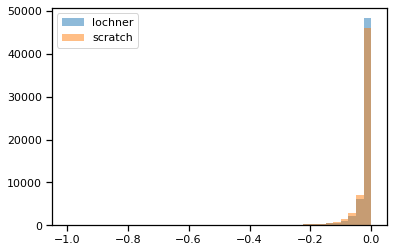

In [45]:
bins = 40
_, bins = np.histogram(np.linspace(-1., 0.), bins=bins)
plt.hist(df['lochner_shift'], alpha=.5, bins=bins, label='lochner')
plt.hist(df['scratch_shift'], alpha=.5, bins=bins, label='scratch')
plt.legend()
# mine may be shifting with active learning a little more

In [46]:
(df['lochner_shift'] < -2).sum(), (df['scratch_shift'] < -2).sum()

(24, 25)